In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
stud = pd.read_csv("stud.csv")
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
stud.shape

(1000, 8)

In [5]:
stud.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [6]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<h3>Data Checks to perform: </h3>
<ul>
<li> Check Missing Values
<li>Check Duplicates
<li>Check Data Type
<li>Check the no. of unique values of each column
<li>Check statistics of data set
<li>Check various categories present in the different categorical column
</ul>


<h3>Checking Missing Values</h3>

In [7]:
stud.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

<h3>Check Duplicates</h3>

In [8]:
stud.duplicated().sum()

0

<h3>Checking Unique Values of Each Column</h3>

In [9]:
stud.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
stud['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
stud['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [12]:
stud.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
stud['total_score'] = stud['math_score'] + stud['reading_score']+stud['writing_score']
stud['average'] = stud['total_score']/3
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full_count = stud[stud['reading_score'] == 100]['average'].count()
writing_full_count = stud[stud['writing_score'] == 100]['average'].count()
math_full_count = stud[stud['math_score'] == 100]['average'].count()

print(reading_full_count)
print(writing_full_count)
print(math_full_count)

17
14
7


In [19]:
reading_fail_count = stud[stud['reading_score'] > 31]['average'].count()
writing_fail_count = stud[stud['writing_score'] > 31]['average'].count()
math_fail_count = stud[stud['math_score'] > 31]['average'].count()

print(reading_fail_count)
print(writing_fail_count)
print(math_fail_count)

990
990
984


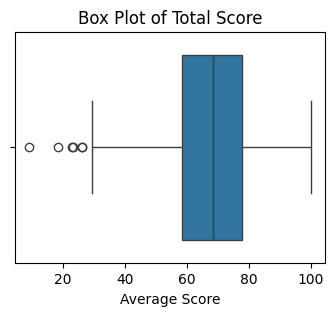

In [39]:
plt.figure(figsize=(4,3))
sns.boxplot(x= stud["average"])

plt.title('Box Plot of Total Score')
plt.xlabel('Average Score')

plt.show()

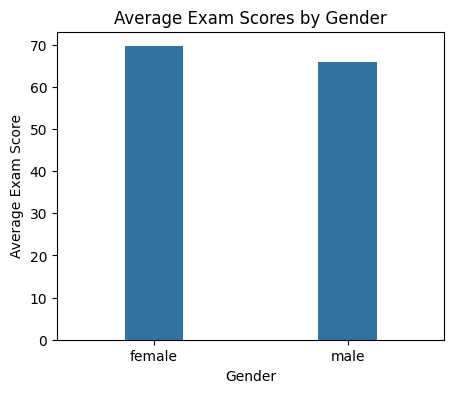

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Assuming your `stud` DataFrame has 'gender' and 'average' columns
plt.figure(figsize=(5, 4))

# Create a bar plot to visualize the average score by gender
sns.barplot(x='gender', y='average', data=stud, ci=None, width = .3)

# Customize the plot title and labels
plt.title('Average Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')

# Display the plot
plt.show()


<h3>Violin Plot</h3>
Contains the qualities of KDE and Box Plot

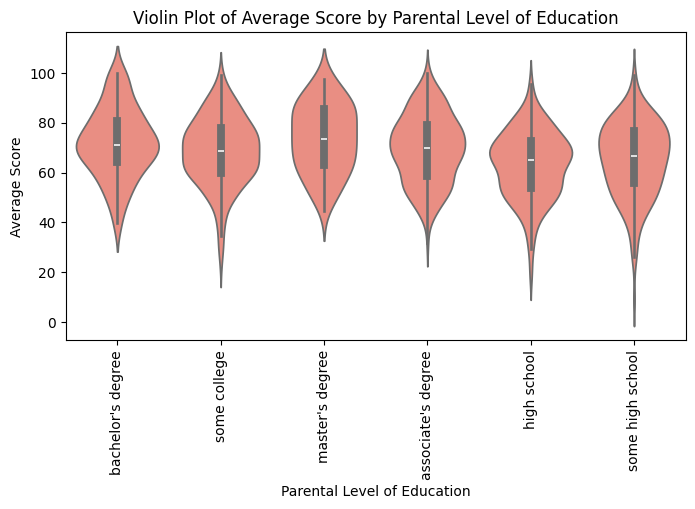

In [47]:
plt.figure(figsize=(8, 4))

# Create a violin plot comparing 'average' scores by 'parental_level_of_education'
sns.violinplot(x='parental_level_of_education', y='average', data=stud, color='salmon')

# Customize the plot
plt.title('Violin Plot of Average Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=90)

# Display the plot
plt.show()
